# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We hav the data for years 2016-2020 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2020.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [2]:
library('tidyverse') 
library('readxl')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [28]:
df_price_index <- read_excel('revised-seasonally-adjusted-indexes-2020.xlsx')
df_price_index |> head()

ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2016,237.652,237.336,238.080,238.992,239.557,240.222,240.101,240.545,241.176,241.741,242.026,242.637
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2017,243.620,243.872,243.766,244.274,244.069,244.218,244.280,245.205,246.551,246.657,247.378,247.736
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2018,248.721,249.300,249.517,250.275,250.786,251.152,251.345,251.735,252.183,252.899,252.822,252.493
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2019,252.441,252.969,254.147,255.326,255.371,255.423,255.925,256.118,256.532,257.387,257.989,258.203
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2020,258.687,258.824,257.989,256.192,255.942,257.282,258.604,259.511,260.149,260.462,260.927,261.560
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2016,99.690,99.905,100.022,100.113,100.281,100.331,100.219,100.126,100.104,99.995,99.722,99.503


We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for the year 2020.

You'll need this months vector for several operations:

In [29]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `Year == 2020`, 
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Group by month and `TITLE` then summarize by finding the mean index for each group.
- And last, use `forcats` to set the levels for the month column (hint: `tct_relevel(name, months)`)

The first three rows of your table will look something like this:

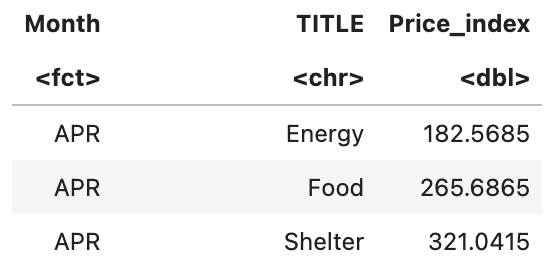

In [37]:
df_price_index |> filter(YEAR == 2020, TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks'), 
                    DATA_TYPE == 'SEASONALLY ADJUSTED INDEX') |>
    pivot_longer(cols = all_of(months), names_to = 'Month')|>
    group_by(Month, TITLE) |>
    summarize(mean_index=mean(value)) |>
    mutate(Month = factor(Month, levels = months)) |>
    mutate(Month = fct_relevel(Month, months))


`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


Month,TITLE,mean_index
<fct>,<chr>,<dbl>
APR,Energy,182.5685
APR,Food,265.6865
APR,Shelter,321.0415
APR,Used cars and trucks,137.9830
AUG,Energy,192.5610
AUG,Food,268.4065
AUG,Shelter,323.1955
AUG,Used cars and trucks,148.0630
DEC,Energy,202.9670


Ok! Now make this plot:

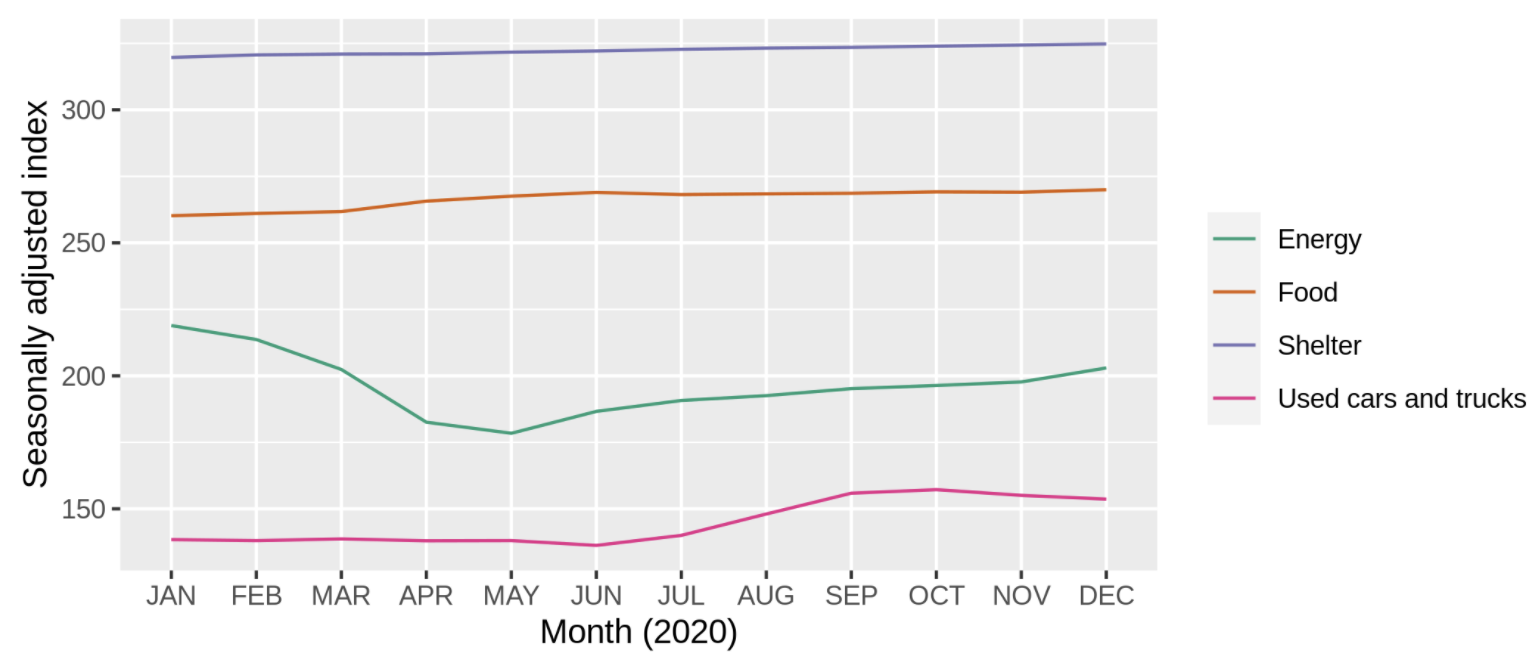

In [42]:
library('RColorBrewer')

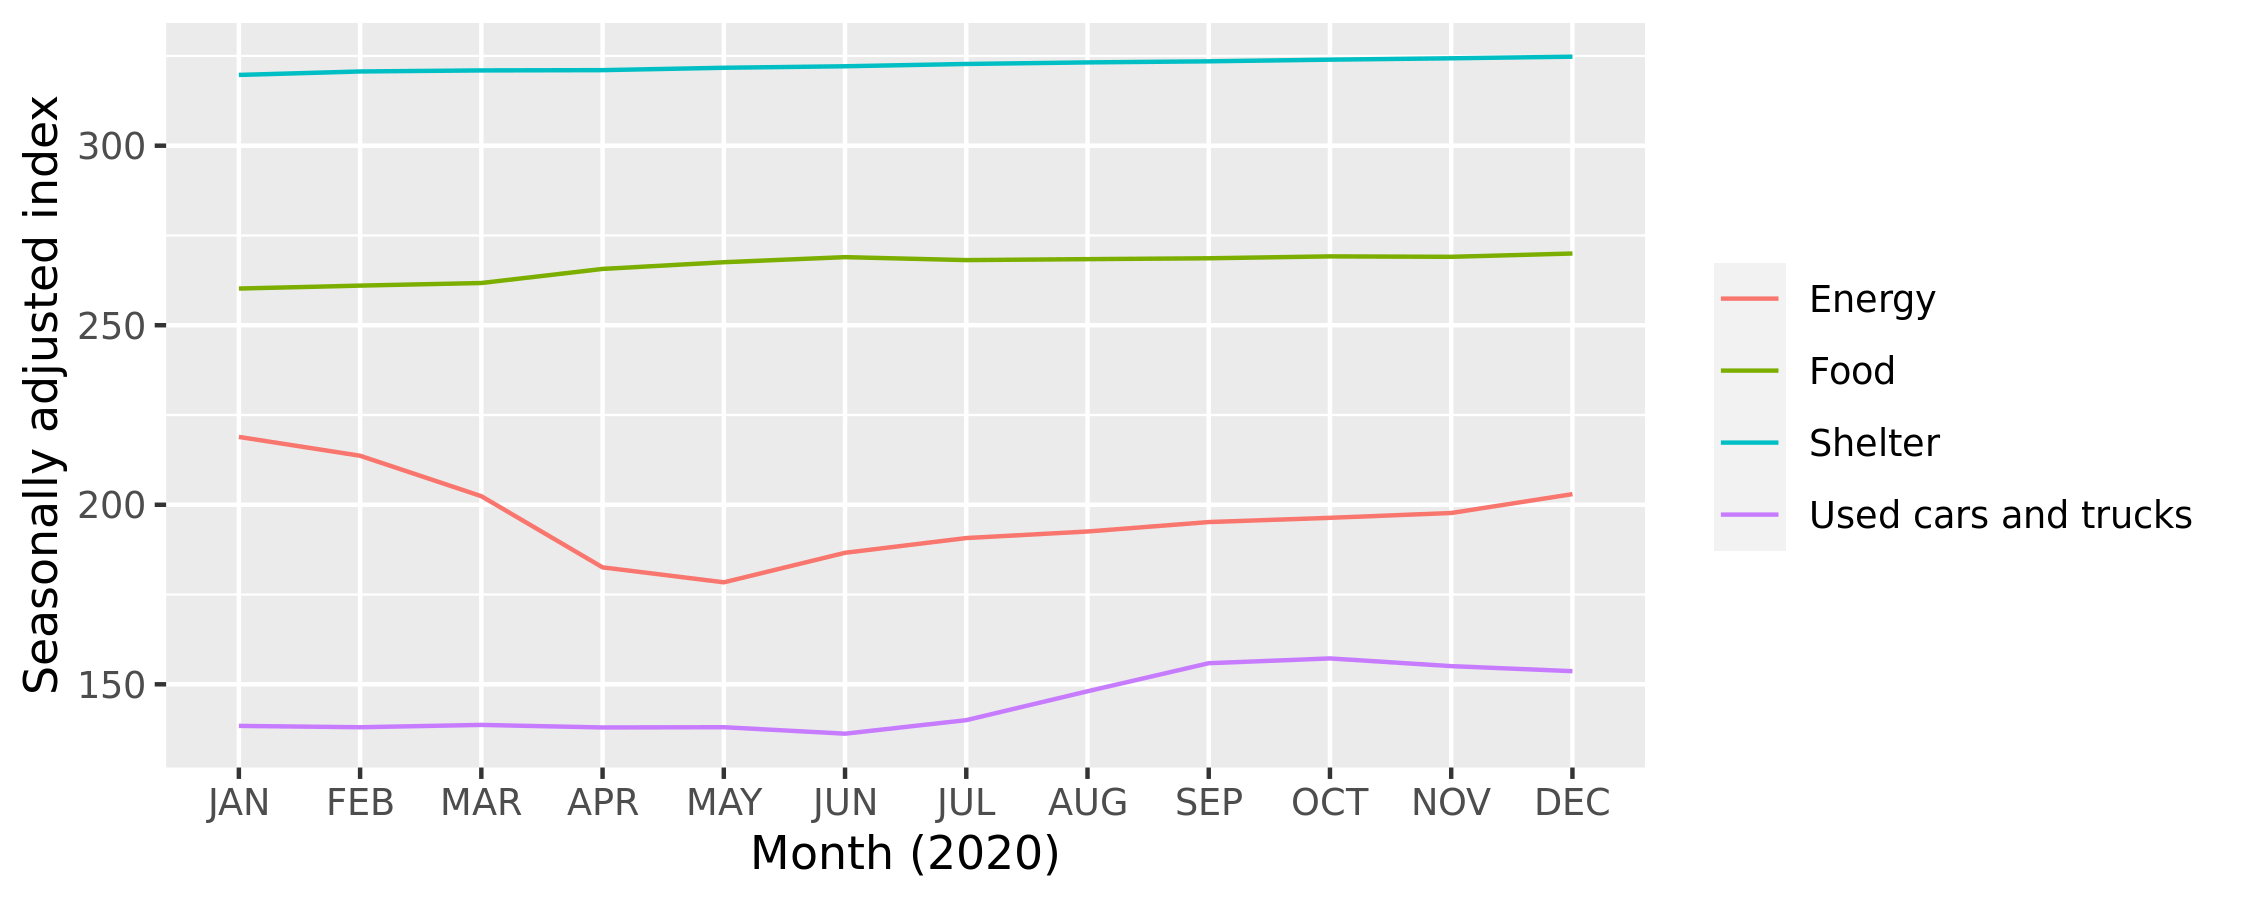

In [57]:
options(repr.plot.res = 300, repr.plot.width = 7.5, repr.plot.height = 3)

p = ggplot(df_price_index2, aes(x=Month, y=mean_index, color = `TITLE`)) + geom_line(aes(group = `TITLE`))+
    labs(x = 'Month (2020)',
         y = 'Seasonally adjusted index') +
    theme(legend.title = element_blank())
         
p

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.